# Logistic Regression with Neural Network mindset

just a feeling test on deeplearning

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy 
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [65]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

In [66]:
index=25
plt.imshow(train_set_x_orig[index])
print ("y = " , str(train_set_y[:, index]) , ", it's a '" ,classes[np.squeeze(train_set_y[:, index])].decode("utf-8") ,  "' picture.")

y =  [1] , it's a ' cat ' picture.


### get the information of trainset

In [72]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
num_px2=train_set_x_orig.shape[2]
print("number of training examples: m_train= ",m_train)
print("number of test examples: m_test= ",m_test)
print("height/width of each image: num_px= ",num_px)
print("sss",num_px2)

number of training examples: m_train=  209
number of test examples: m_test=  50
height/width of each image: num_px=  64
sss 64


In [73]:
# reshape them  np.array(train_set_x_orig)
#the first level stay stable, others flatern.
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print("train_set_x_flattern shape: ",train_set_x_flatten.shape)
print("test_set_x_flattern shape: ",test_set_x_flatten.shape)
print("sanity check after reshape: ",train_set_x_flatten[0,0:10])

train_set_x_flattern shape:  (12288, 209)
test_set_x_flattern shape:  (12288, 50)
sanity check after reshape:  [ 17 196  82   1   9  84  56  19  63  23]


In [74]:
#standard the data
train_set_x=train_set_x_flatten/255.
test_set_x=test_set_x_flatten/255.

# building the parts of our algorithm

1. define the model structure
2. initialize model's parameters
3. Loop:
   calculate current loss(forward propagation)
   calculate current gradient(backward propagation)
   update parameters (gradient descent)

### helper functions

In [75]:
from basic_me import np_sigmoid
def sigmoid(z):
    """
    compute the sigmoid of z
    Arguments:
     z-- a scalar or numpy array of any size
     return :
     s--- sigmoid(z)
    """
    s=np_sigmoid(z)
    return s
    

In [76]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


### 4.2 initialzing parameters

In [77]:
def initialize_with_zeros(dim):
    """
    w --0 vector and b--0
    Augument:
    dim -- size of w vector 
    
    returns :
    w -- vector 
    b -- scalar
    """
    #!!!attention ,can not use np.zeros(dim)
    w=np.zeros((dim,1))
    b=0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float)or isinstance(b,int))
    return w,b
    
    

In [78]:
dim =2
w,b=initialize_with_zeros(dim)
ww=w.shape[0]
print(ww)
print("w= ",w)
print("b= ",b)

2
w=  [[ 0.]
 [ 0.]]
b=  0


### 4.3  forward and backward propagation

### this roi is weak

In [79]:
import numpy as np
xxx=np.array([[1,2,3]])
zzz=np.array([[4,5,6]])
print(xxx.T*zzz)
print(np.dot(xxx.T,zzz))
yyy=np.log(xxx)
1-xxx
print(np.log(xxx))

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
[[ 0.          0.69314718  1.09861229]]


You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [80]:
from basic_me import np_sigmoid
import numpy as np
def propagate(w,b,X,Y):
    """
    Arguments:
    w --- weights , a numpy array of size (num_px*num_px*3,1),wihch is equal to image pixels number
    b --- bias , a scalar
    X --- data of size (num_px*num_px*3, number of examples)
    Y --- true label of size( 1, number of examples )
    """
    #m --- number of examples
    m=X.shape[1]
    
    #A=w.T*X+b    my wrong and view the solution.....
    A=np_sigmoid(np.dot(w.T,X)+b)
    #Y*np.log(A)+(1-Y)np.log(1-A)  #mine is right , but i did not go on .......
    cost=-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    #be attention to use np.dot() but not A.T....
    #dw=1/m*X(A-Y).T
    dw=1/m*np.dot(X,(A-Y).T)
    db=1/m*np.sum(A-Y)
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    grads={"dw":dw,
          "db":db}
    return grads,cost
    
                     
    

In [81]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " ,grads["dw"])
print ("db = " , grads["db"])
print ("cost = " , cost)

dw =  [[ 0.99993216]
 [ 1.99980262]]
db =  0.499935230625
cost =  6.00006477319


In [82]:
import numpy as np
temp1=np.array([[1,2,3],
               [3,4,5]])
temp2=np.array([3,4,5])
temp3=np.sum(temp1)
print(temp3)

18


### optimization

the update rule is $ \theta = \theta - \alpha \text{ }d\theta $  
and $ \alpha $ is the learning rate.

In [83]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    """
    this function optimizes w and b by runting a gradient descent.
    Arguments: 
    w---weights, a numpy of size(num_px*num_px*3,1)
    b---bias, a scalar
    X--- data of shape(num_px*num_px*3,number of examples)
    Y--- true "label" vector of shape(1, number of examples)
    num_iterations --- number of iterations of the optimization loop 
    learning_rate --- learning rate of the gradient descent update rule 
    print_cost --- true to print the loss every 100 steps
    
    returns :
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve .
    """
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        #update rule
        w=w-learning_rate*dw
        b=b-learning_rate*db
        #records the costs
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("cost after iteratrion %i: %f"%(i,cost))
    params={"w": w,
           "b": b}
    grads={"dw":dw,
          "db":db}
    return params,grads,costs
            
    

In [84]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679


In [85]:
from basic_me import np_sigmoid
def predict(w,b,X):
    """
    predict whether the label is 0 or 1 using learned parameters(w,b)
    Argument:
    w---weights ,  a numpy array of size( num_px*numpx*3,1)
    b--- bias, a scalar 
    X-- data of size(num_px*num_px*3,number of examples )
    
    returns: 
    Y_predictions -- a numpy array containing all predictions(0/1)for the examples in X
    """
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    #data first lever tensor number. but why?? at start it`s value shoud be equal to X.shape[0]
    w=w.reshape(X.shape[0],1)
    A=np_sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if A[0,i]<0.5:
            Y_prediction[0,i]=0
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
    assert(Y_prediction.shape==(1,m))
    return Y_prediction
        
    

In [86]:
print('w: ',w)
print('b: ',b)
print ("predictions = " + str(predict(w, b, X)))

w:  [[1]
 [2]]
b:  2
predictions = [[ 1.  1.]]


# Merge all functions into a model

In [133]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=3000,learning_rate=0.5,print_cost=False):
    """
    builds the logistic regression model by calling the funtion above
    Arguments:
    X_train -- training set (num_px*num_px*3, m_train)
    Y_train -- training label(1, m_train)
    X_test --- test set(num_px*num_px*3,m_test)
    Y_test -- test label(num_px*num_px*3,m_label)
    num_iterations --- hyperparameter representing the number of iterations to optimize the params
    learning_rate -- learning rate used in the update rule of optimize()
    print_cost -- set to true to print the cost every 100 iterations. and this case,will 20 times.
    
    
    returns:
    d dictionary contains information about the model    
    """
    
    w,b =initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w=parameters["w"]
    b=parameters["b"]
    
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    
    print("train accuracy : {}% ".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {}% ".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    #d={"costs": costs,
    #  "Y_prediction_test":Y_prediction_test,
    #  "Y_prediction_train":Y_prediction_train,
    #  "w":w,
    #  "b":b,
    #  "learning_rate":learning_rate,
    #  "num_iterations":num_iterations}
    d={"costs": costs,
      "Y_prediction_test":(100-np.mean(np.abs(Y_prediction_test-Y_test))*100),
      "Y_prediction_train":(100-np.mean(np.abs(Y_prediction_train-Y_train))*100),
      "w":w,
      "b":b,
      "learning_rate":learning_rate,
      "num_iterations":num_iterations}
    return d
    

In [158]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


cost after iteratrion 0: 0.693147
cost after iteratrion 100: 0.584508
cost after iteratrion 200: 0.466949
cost after iteratrion 300: 0.376007
cost after iteratrion 400: 0.331463
cost after iteratrion 500: 0.303273
cost after iteratrion 600: 0.279880
cost after iteratrion 700: 0.260042
cost after iteratrion 800: 0.242941
cost after iteratrion 900: 0.228004
cost after iteratrion 1000: 0.214820
cost after iteratrion 1100: 0.203078
cost after iteratrion 1200: 0.192544
cost after iteratrion 1300: 0.183033
cost after iteratrion 1400: 0.174399
cost after iteratrion 1500: 0.166521
cost after iteratrion 1600: 0.159305
cost after iteratrion 1700: 0.152667
cost after iteratrion 1800: 0.146542
cost after iteratrion 1900: 0.140872
train accuracy : 99.04306220095694% 
test accuracy: 70.0% 


In [159]:
# one sample test wrong ,the index is 10 ,and all most is right.

#index=1
#plt.imshow(test_set_x[:,index].reshape(num_px,num_px,3))
#print(d["Y_prediction_test"][0,index])
#import cv2
#image=test_set_x[:,index].reshape(num_px,num_px,3)
#cv2.imshow("image",image)
#cv2.waitKey()

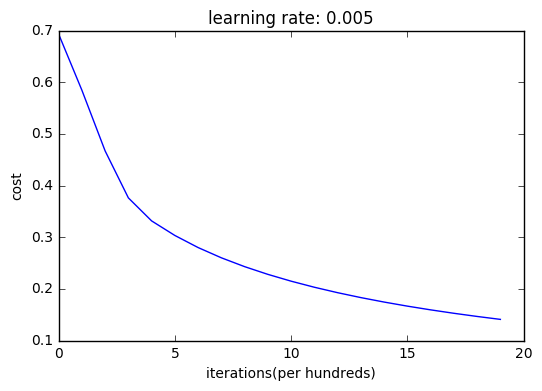

In [160]:
# no difference????
#print(costs)
costs=np.squeeze(d['costs'])
#costs_1=np.squeeze(d['costs'])
#print(costs_1)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title('learning rate: '+str(d['learning_rate']))
plt.show()

如果是想画出test_accuracy和trian_accuracy的话，是要中途进行测试，而不是最后完了弄。课程中提到的观察test_accuracy 和train_accuracy是最后的结果，而不是过程中结果。
当迭代次数为2000时，测试集准确率和训练集准确率分别为：77，99
当迭代次数为3000时，测试集准确率和训练集准确率分别为：68%，99.5
当迭代次数为3000时，测试集准确率和训练集准确率分别为：70%，99.52
当迭代次数为3000时，测试集准确率和训练集准确率分别为：70%，100

In [161]:
test_accuracy=np.squeeze(d['Y_prediction_test'])
print(test_accuracy)

70.0


In [164]:
import cv2
images=cv2.imread("3.jpg")
images.shape
#res=cv2.resize(image,(32,32),interpolation=cv2.INTER_CUBIC)
images_resize=cv2.resize(images,(num_px,num_px))
#cv2.imshow("sss",images_resize)
#cv2.waitKey()
#images_resize=images.resize(num_px,num_px)
print(type(images_resize))
images_vector=images_resize.reshape(num_px*num_px*3,1)
result=predict(d["w"],d["b"],images_vector)
print(np.squeeze(result))

<class 'numpy.ndarray'>
0.0
